<a href="https://colab.research.google.com/github/ane0526/data_123/blob/master/200818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


## 1. 개요

-IRIS 붓꽃 분류 모형을 만든다



### (1) 패키지 불러오기

-sk learn을 불러온다


### (2) 데이터 불러오기

sklearn 패키지 내장 데이터 있음






In [11]:
 from sklearn.datasets import load_iris

iris=load_iris()   #Bunch 형태의 데이터셋으로 구성되어 있음


#독립 변수로 구성된 데이터..
iris_data=iris.data

#종속변수
iris_label=iris.target
print('iris target 값:',iris_label[[0,50,100]])
print('iris target 명:',iris.target_names)

iris target 값: [0 1 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


###(3) 데이터 전처리


* 상황:NumPy 형태, 리스트
* 방법:pandas를 활용해서 데이터 프레임 만들기

-ref
[How to convert a Scikit-learn dataset to a Pandas dataset?]
https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878



In [12]:
import pandas as pd
from sklearn import datasets

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
df_iris
print(df_iris.head(3).to_markdown())

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   target |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|---------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |        0 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |        0 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |        0 |


###(4) 데이터 시각화

*   시각화를 위한 전처리




In [13]:

temp_data=df_iris.copy()
#print(temp_data.info())


#column명 바꾸기
temp_data.columns=["sepal_length","sepal_width","petal_length", "petal_width","species"]
#temp_data.info()

#map
#0->"setosa"
replace_fct={0:"setosa",1:"versicolor",3:"verginica"}

temp_data['species']=temp_data['species'].map(replace_fct)
print(temp_data.head(3))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


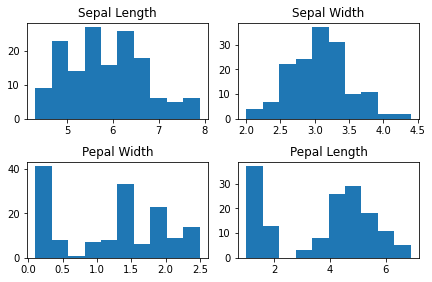

In [14]:
import matplotlib.pyplot as plt

n_bins = 10
fig, axs = plt.subplots(2, 2) # 그래프를 그리기 위해 일종의 레이아웃을 작성한다. 
axs[0, 0].hist(temp_data['sepal_length'], bins = n_bins);
axs[0, 0].set_title('Sepal Length');
axs[0, 1].hist(temp_data['sepal_width'], bins = n_bins);
axs[0, 1].set_title('Sepal Width');
axs[1, 0].hist(temp_data['petal_width'], bins = n_bins);
axs[1, 0].set_title('Pepal Width');
axs[1, 1].hist(temp_data['petal_length'], bins = n_bins);
axs[1, 1].set_title('Pepal Length');

fig.tight_layout(pad=1.0);

###(5) 데이터셋 분리
학습용 데이터와 테스트용 데이터 분리



In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test =train_test_split (iris_data,
                                                   iris_label, 
                                                   test_size=0.2,
                                                   random_state=1 )




*   arrays
*  test_size,비율 (훈련데이터/테스트 데이터)


*   random_state는 실험의 재현성을 위한 코드


###(6)머신러닝 모형 학습


*   머신러닝 모형을 만든다



In [22]:
from sklearn.tree import DecisionTreeClassifier

#객체 생성
dt_clf=DecisionTreeClassifier(random_state=11,max_depth=2)

#학습 수행
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

###(7) 모형 테스트



*   모형 예측



In [23]:
from sklearn.metrics import accuracy_score
pred=dt_clf. predict(x_test)
print("The accuracy of the Decision Tree is : {:.3f}".format(accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is : 0.967


###(8) 모형 결과 시각화



*  모형 결과에 대해 혼동행렬로 시각화






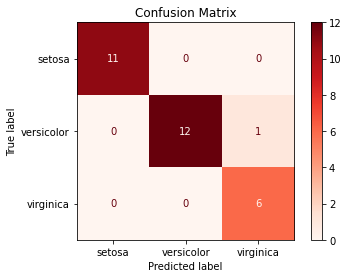

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             x_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

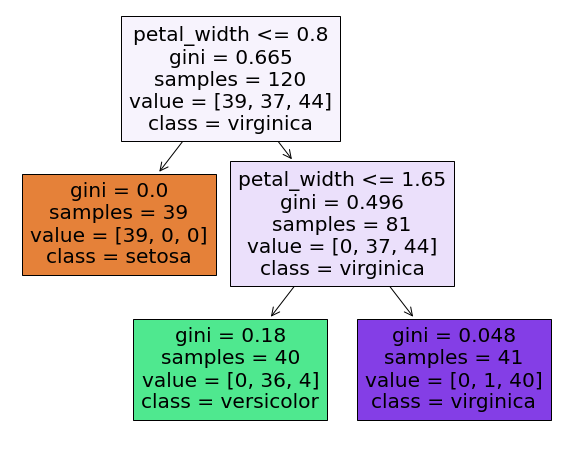

In [25]:
import matplotlib.pyplot as plt

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);
